In [1]:
%pylab inline
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Function for adding an sphere
def addSphere (mat3d, bulk_size, sph_pos, sph_r, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    sph_pos_int = np.empty(3, dtype=int)
    
    sph_pos_int[0]=int(round((sph_pos[0]+bulk_size[0]/2)/dbulk[0]))
    sph_pos_int[1]=int(round((sph_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    sph_pos_int[2]=int(round((sph_pos[2])/dbulk[2]))
    sph_r_int=sph_r/dbulk[0]
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if (sqrt((x - sph_pos_int[0])**2  + (y - sph_pos_int[1])**2 + (z - sph_pos_int[2])**2) <= sph_r_int):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [3]:
# Funciotn for adding a cylinder in the XY plane
def addXYCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_z, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=cyl_r/dbulk[0]
    cyl_z_int=cyl_z/dbulk[1]
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((x - cyl_pos_int[0])**2  + (y - cyl_pos_int[1])**2) <= cyl_r_int and abs(z - cyl_pos_int[1]) <= cyl_z_int/2)):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [4]:
# Funciotn for adding a cylinder in the XZ plane
def addXZCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_y, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=cyl_r/dbulk[0]
    cyl_y_int=cyl_y/dbulk[1]
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((x - cyl_pos_int[0])**2  + (z - cyl_pos_int[2])**2) <= cyl_r_int and abs(y - cyl_pos_int[1]) <= cyl_y_int/2)):
                    mat3d[x,y,z] = desc                  
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [5]:
# Funciotn for adding a cylinder in the YZ plane
def addYZCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_y, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=cyl_r/dbulk[0]
    cyl_y_int=cyl_y/dbulk[1]
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((y - cyl_pos_int[1])**2  + (z - cyl_pos_int[2])**2) <= cyl_r_int and abs(x - cyl_pos_int[0]) <= cyl_y_int/2)):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [6]:
def XYRotate (inMatrix, angle):
    size_z = inMatrix.shape[2]
    rotMatrix = np.zeros(inMatrix.shape)
    for z_depth in range(size_z):
         rotMatrix[:,:,z_depth] = ndimage.rotate(inMatrix[:,:,z_depth], angle, reshape=False, order=0, cval=1)
    rotMatrix=np.ceil(rotMatrix)
    return rotMatrix

In [8]:
# 3D bulk size info
grid_size = 10
thickness = 4
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
print(size_lat*size_lat*size_depth)

1024000


In [19]:
# Add spheres

bulk3d = np.full((size_lat,size_lat,size_depth),1,dtype=int)
bulk3d_size = [4*thickness, 4*thickness, thickness]

sph_pos1 = (-0.2, -0.5, 1.95)
sph_pos2 = (1.2, -0.5, 1.95)
#sph_pos3 = (-1, -sqrt(3), 1.15)
#sph_pos4 = (sqrt(15), 1, 1.15)
#sph_pos5 = (sqrt(15), -1, 1.15)

#addSphere(bulk3d, bulk3d_size, sph_pos1, 0.5, 2)
#addSphere(bulk3d, bulk3d_size, sph_pos2, 0.3, 3)
#addSphere(bulk3dSph, bulk3d_size, sph_pos3, 0.6, 2)
#addSphere(bulk3d, bulk3d_size, sph_pos4, 0.5, 2)
#addSphere(bulk3d, bulk3d_size, sph_pos5, 0.5, 2)

# Flatten matrix and save
bulk_flat = bulk3d.T.reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat.shape)

filename = "/home/nicolas/CUDAMCFL/BulkDesc/3Dbulk-quiste-fondo10"
with open(filename,"wb") as f:
                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

(1, 1024000)


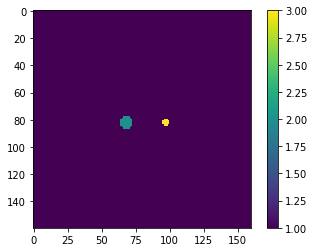

In [16]:
plt.imshow(bulk3d[:,:,15].T,vmin=1)
cbar = plt.colorbar()

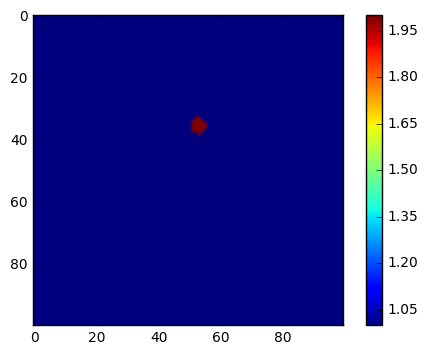

In [26]:
bulk3dRot = XYRotate(bulk3d, 105)

plt.imshow(bulk3dRot[:,:,5].T)
cbar = plt.colorbar()

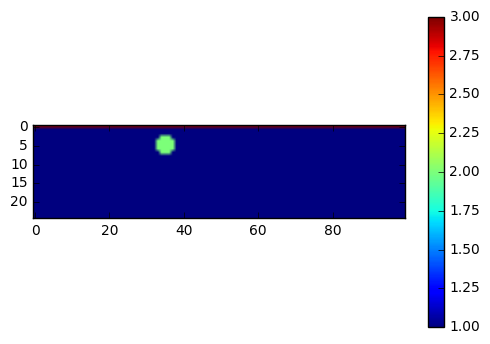

In [11]:
for x in range(bulk3d.shape[0]):
    for y in range(bulk3d.shape[1]):
        for z in range(bulk3d.shape[2]):
            if (z < 0.2*grid_size) : bulk3d[x,y,z] = 3 
plt.imshow(bulk3d[:,50,:].T,vmin=1)
cbar = plt.colorbar()

In [24]:
# Add cylinders

bulk3dCyl = np.full((size_lat,size_lat,size_depth),1,dtype=int)
bulk3dCyl_size = [4*thickness, 4*thickness, thickness]

cyl_pos1 = (-3.5, 0, 1.)
cyl_pos2 = (-1.5, 0, 1.)
cyl_pos3 = (0.5, 0, 1.)

addXZCyl(bulk3dCyl, bulk3dCyl_size, cyl_pos1, 0.5, 4, 2)
addXZCyl(bulk3dCyl, bulk3dCyl_size, cyl_pos2, 0.5, 4, 2)
addXZCyl(bulk3dCyl, bulk3dCyl_size, cyl_pos3, 0.5, 4, 2)

221 128000
221 128000
221 128000


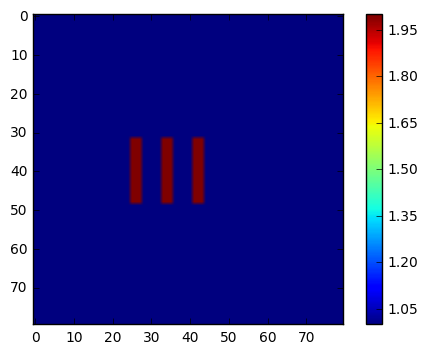

In [25]:
plt.imshow(bulk3dCyl[:,:,5].T,vmin=1)
cbar = plt.colorbar()

In [28]:
# Flatten matrix and save
bulk_flat = bulk3dCyl.T.reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat.shape)

filenameCyl = "/home/nicolas/CUDAMCFL/BulkDesc/3Dbulk-wfr-cyl-z1"
with open(filenameCyl,"wb") as f:
                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

(1, 128000)


In [15]:
# Flatten matrix and save
bulk_flat = bulk3dSph.T.reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat.shape)

filenameSph = "3Dbulk-sph-gs1"
#with open(filenameSph,"wb") as f:
#                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

NameError: name 'bulk3dSph' is not defined

In [ ]:
# Generate and save homogeneous matrix for background
bulk_flat_back = np.full((size_lat,size_lat,size_depth),1,dtype=int).reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat_back.shape)

filename_back = "3Dbulk-fondo-gs1"
#with open(filename_back,"wb") as f:
#                savetxt(f, bulk_flat_back, fmt='%i', delimiter=" ")

In [12]:
# Full simulation of whole field reflectance experiment
# 3D bulk size info
grid_size = 4
thickness = 5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
print(size_lat*size_lat*size_depth)

# Add spheres

bulk3d = np.full((size_lat,size_lat,size_depth),1,dtype=int)
bulk3d_size = [4*thickness, 4*thickness, thickness]

sph_pos1 = (-4.5, 0, 1.5)
sph_pos2 = (0, 0, 1.5)
sph_pos3 = (2.5, 2.5, 1.5)
sph_pos4 = (-6.5, -4.5, 1.5)
cyl_pos1 = (1.5, 0., 1.2)
cyl_pos2 = (2.5, 0., 1.2)


#addSphere(bulk3d, bulk3d_size, sph_pos1, 0.3, 2)
addSphere(bulk3d, bulk3d_size, sph_pos4, 0.6, 2)
#addSphere(bulk3d, bulk3d_size, sph_pos3, 0.3, 2)
#addSphere(bulk3d, bulk3d_size, sph_pos4, 0.6, 2)

addYZCyl(bulk3d, bulk3d_size, cyl_pos1, 0.3, 10, 2)
addXZCyl(bulk3d, bulk3d_size, cyl_pos1, 0.3, 10, 2)

128000
57 128000
205 128000
205 128000


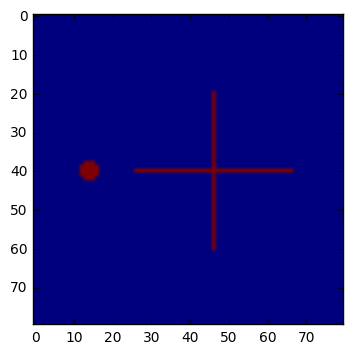

In [13]:
bulk3dTemp = XYRotate(bulk3d, 0)
plt.imshow(bulk3dTemp[:,:,6].T,vmin=1)
#cbar = plt.colorbar()

In [14]:
filename = "/home/nicolas/CUDAMCFL/BulkDesc/3Dbulk-wfr-trans2b"
with open(filename,"wb") as f:
    savetxt(f, bulk3dTemp.T.reshape(1,size_lat*size_lat*size_depth), fmt='%i', delimiter=" ")     

/home/nicolas/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


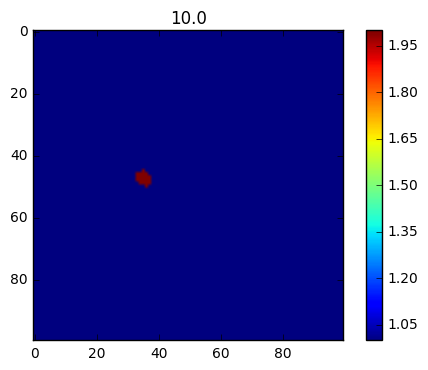

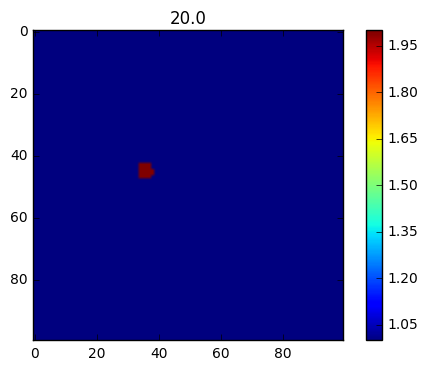

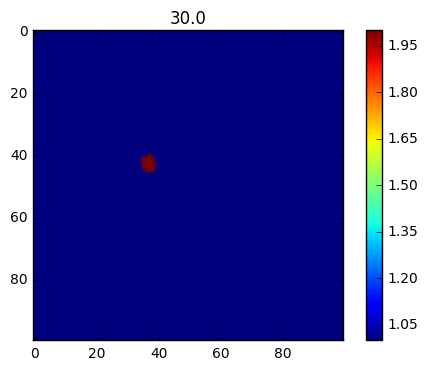

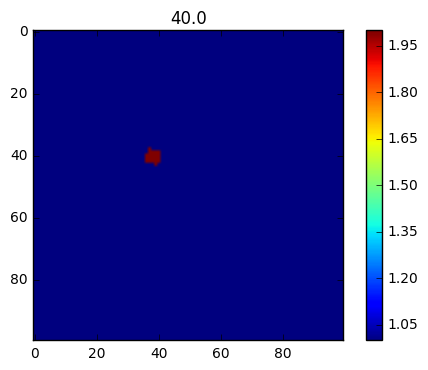

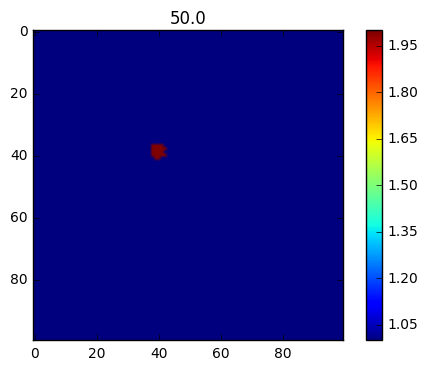

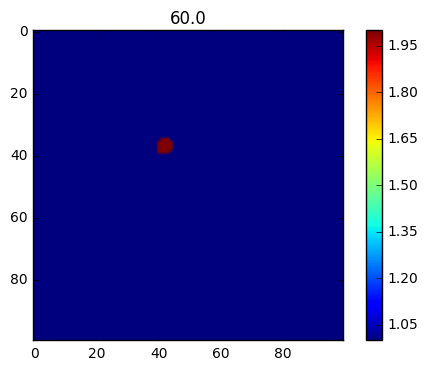

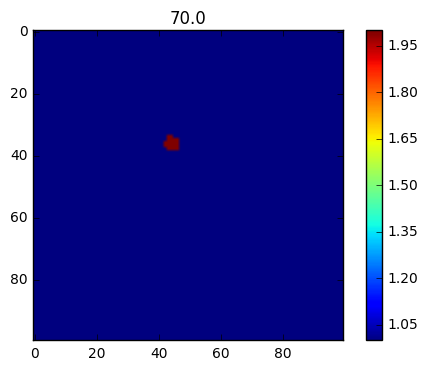

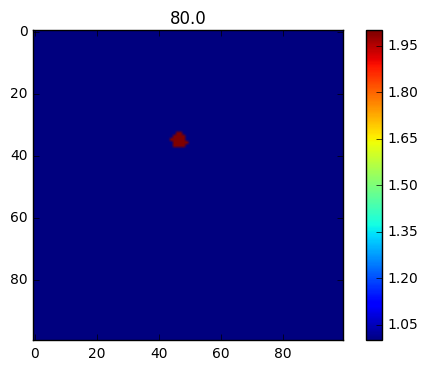

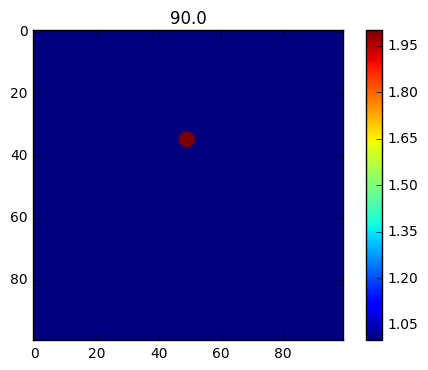

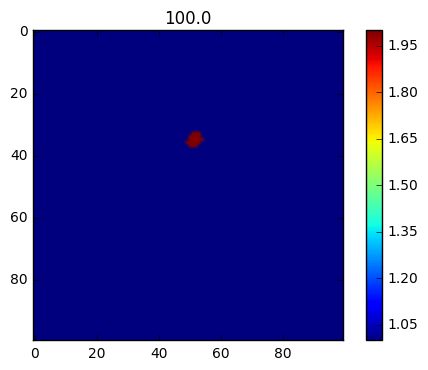

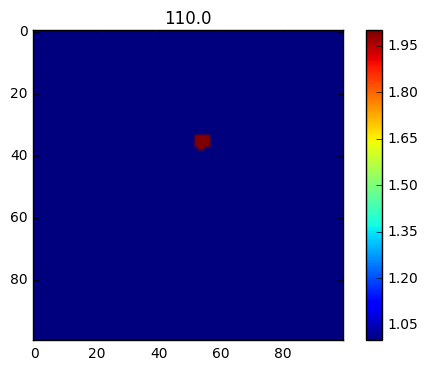

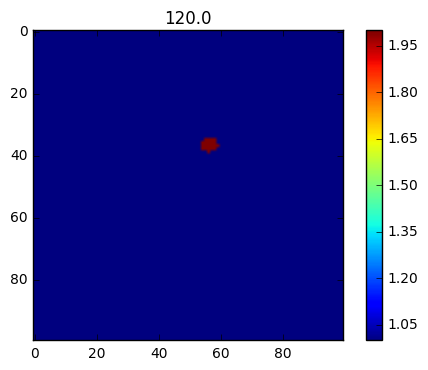

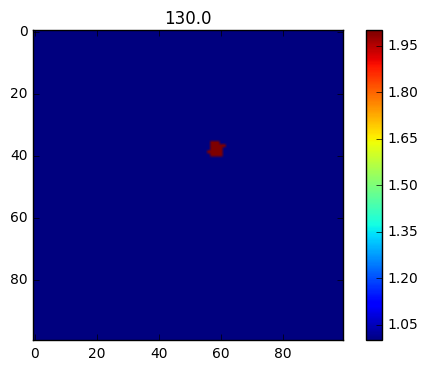

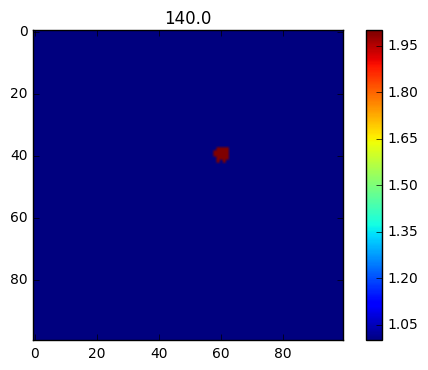

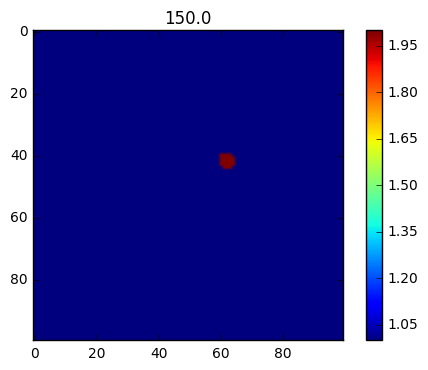

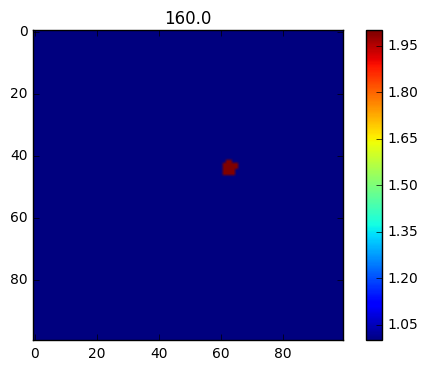

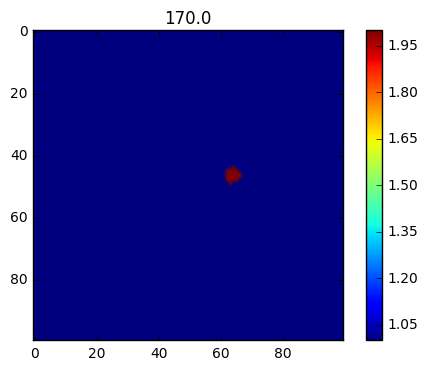

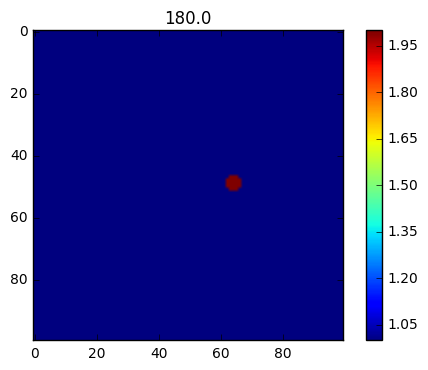

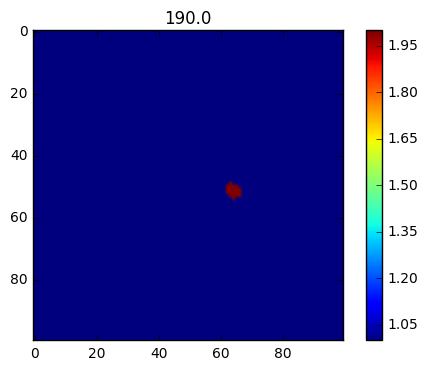

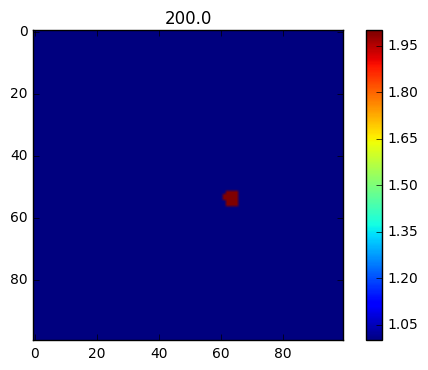

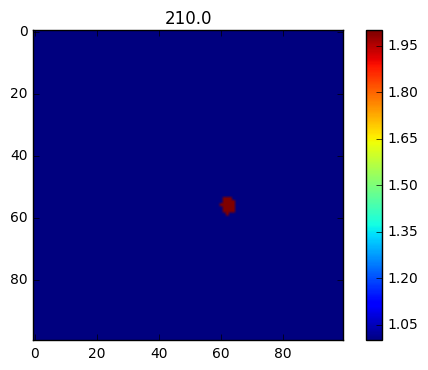

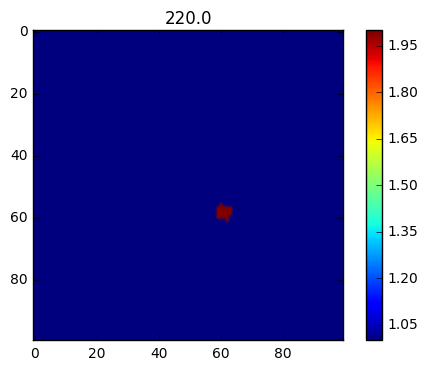

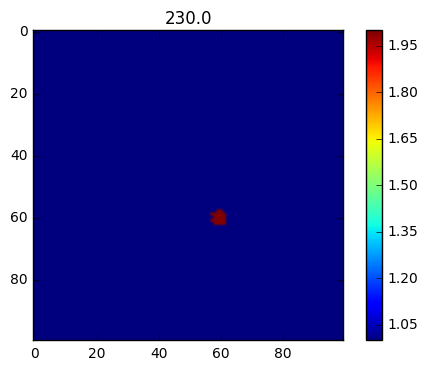

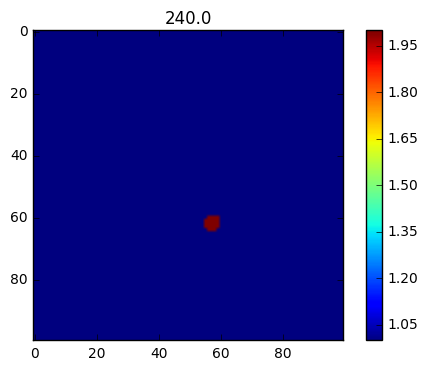

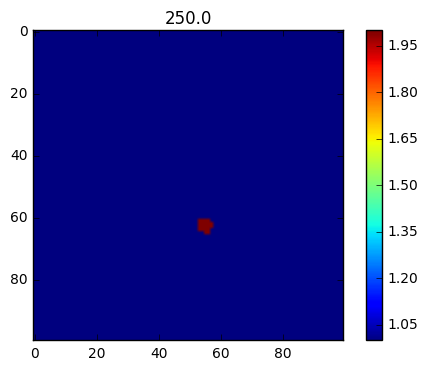

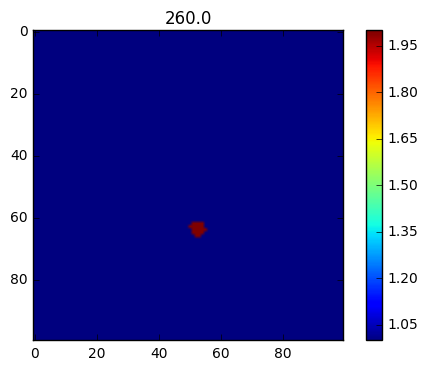

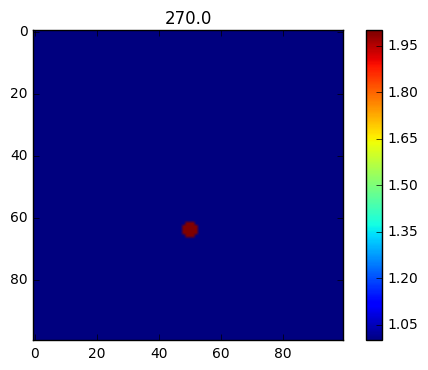

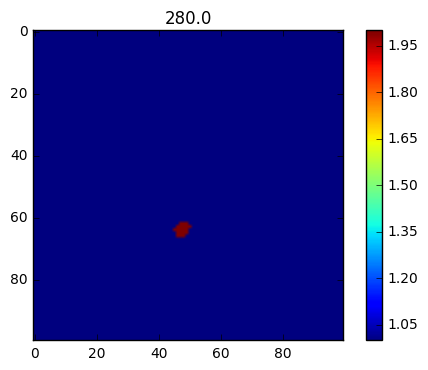

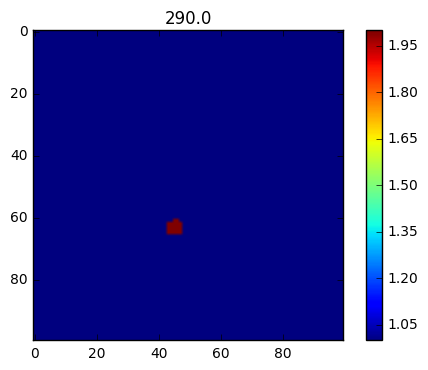

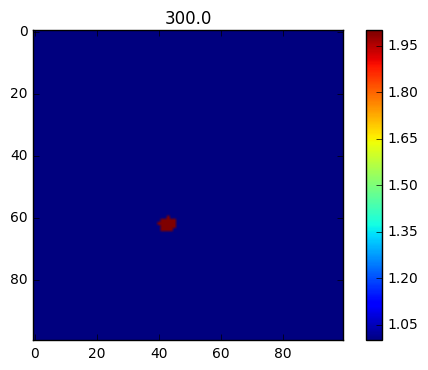

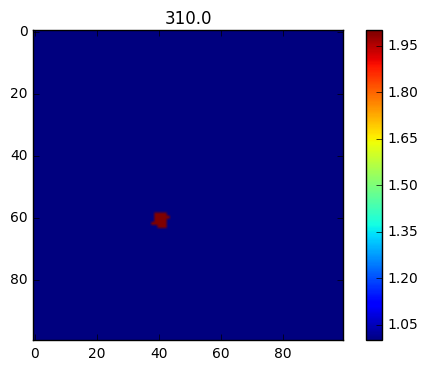

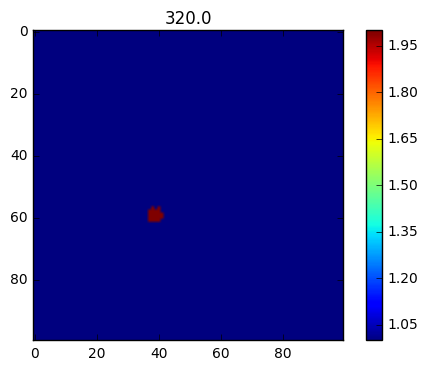

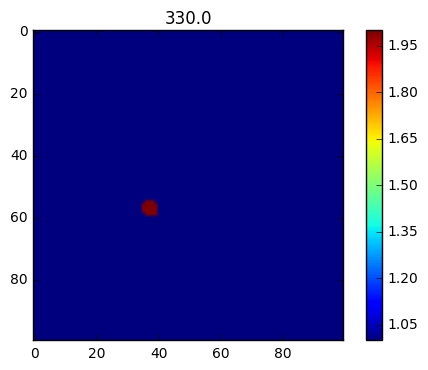

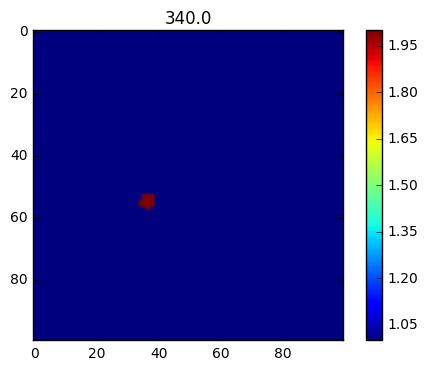

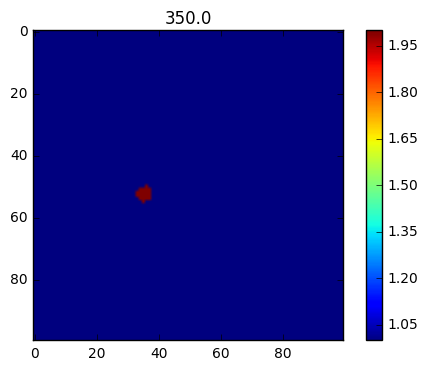

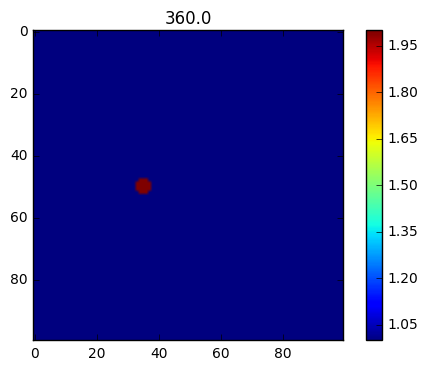

In [16]:
# Rotate the image to perform the normalization and the scanning
numRots=36
angle = 0
for i in range (numRots):
    bulk3dRot = np.full((size_lat,size_lat,size_depth),1,dtype=int)
    angleRot = 360/numRots
    angle += angleRot
    bulk3dRot = XYRotate(bulk3d, angle)
    fig = plt.figure()
    plt.imshow(bulk3dRot[:,:,6].T,vmin=1)
    plt.title(str(angle))
    cbar = plt.colorbar()
    filename = "/home/nicolas/CUDAMCFL/BulkDesc/jnirs-noCover-z1-a"+ str(round(angle))
    with open(filename,"wb") as f:
        savetxt(f, bulk3dRot.T.reshape(1,size_lat*size_lat*size_depth), fmt='%i', delimiter=" ")        

In [9]:
# Full simulation of whole field reflectance experiment - Dog breast tummor
# 3D bulk size info
grid_size = 10
thickness = 2.5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
print(size_lat, size_depth, size_lat*size_lat*size_depth)

bulk3d = np.full((size_lat,size_lat,size_depth),1,dtype=int)
bulk3d_size = [4*thickness, 4*thickness, thickness]
print (bulk3d_size)

# Add muscle and skin
for x in range(bulk3d.shape[0]):
    for y in range(bulk3d.shape[1]):
        for z in range(bulk3d.shape[2]):
            if (z < 0.2*grid_size) : bulk3d[x,y,z] = 2 #skin
            if (z > 0.7*grid_size and z <= 1.5*grid_size) : bulk3d[x,y,z] = 3 #muscle with fluo
            if (z > 1.5*grid_size) : bulk3d[x,y,z] = 4 #muscle without fluo

# Add tumors
sph_pos1 = (-1, 1, 0.5)
sph_pos2 = (2, -1, 0.5)
addSphere(bulk3d, bulk3d_size, sph_pos1, 0.1, 5) #tumor
addSphere(bulk3d, bulk3d_size, sph_pos2, 0.2, 5) #tumor

#Save file
filename = "/home/nicolas/CUDAMCFL/BulkDesc/3Dbulk-wfr-dog"
with open(filename,"wb") as f:
    savetxt(f, bulk3d.T.reshape(1,size_lat*size_lat*size_depth), fmt='%i', delimiter=" ")   

100.0 25.0 250000.0
[10.0, 10.0, 2.5]


/home/nicolas/.local/lib/python3.5/site-packages/numpy/core/numeric.py:297: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


7 250000
33 250000


/home/nicolas/.local/lib/python3.5/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


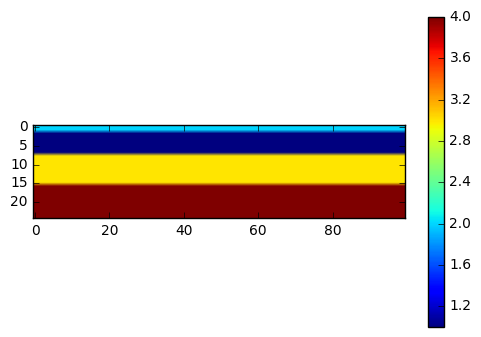

In [13]:
plt.imshow(bulk3d[1,:,:].T,vmin=1)
cbar = plt.colorbar()